# Introduction to Recommender Systems
© Explore Data Science Academy

## Learning Objectives

In this train you will:

- Understand the purpose and basic operation of a recommender system;
- Understand the role of similarity metrics utilised in recommender algorithms;
- Learn how recommender system performance is assessed;
- Gain an intuition for the basic operation of content-based filtering; 
- Learn how to implement a simple content-based filtering algorithm;
- Gain an intuition for the basic operation of collaborative filtering;
- Learn how to implement a simple collaborative-based filtering algorithm, and; 
- Understand some of the trade-offs offered between content and collaborative-based filtering.

## Outline

This train is structured as follows:

- Introduce recommender systems.
    - Problem Relevance 
    - Items, Users and Ratings
- Similarity Measures
- Assessing a recommender system  
- Content-based filtering 
    - How it works  
    - Implementation
        - Top-N recommendations 
        - User-item rating prediction 
- Collaborative filtering 
    - How it works
    - Implementation 
       - Top-N recommendations 
       - User-item rating prediction  
- Collaborative vs. Content filtering: trade-offs and comparisons
- Conclusion

## The Importance of Making Recommendations

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Long_tail_problem.jpg"
     alt="The Long Tail Problem"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
The Long tail problem often experienced by content distributors. 
</div>


We exist in a technological era where there is far too much content (movies, news articles, shopping products, websites, etc.) for individual items to each receive our personal consideration. For example, consider that the average Google search returns well over 1 million results, yet when last did you look at the websites past the [first page](https://backlinko.com/google-ctr-stats)?  This fact is often illustrated by what is known as the "long tail problem" (represented in the figure above), where tracking user engagement with items in a large content repository sees a small number of these items receiving a disproportionate amount of attention, while the majority of items are unexplored. The truth is that a user simply doesn't know of each item which exists, nor has the time to inspect each item even if it were known. 

In light of the above challenge, a natural question for service providers becomes: "how do I ensure that an individual is shown a manageable portion of the total content I have available, while also ensuring that this content is relevant to and desired by them?" It turns out that this is actually an extremely valuable question, both economically and within society as a whole. Luckily for us, decades of hard work by very intelligent individuals has largely answered this question through a collection of algorithms and computing techniques known as recommender systems. 


Simply put, a recommender system functions by predicting a user's rating or preference for an item. This allows a service provider to build up a catalog of items which it believes the user will want to examine - thereby increasing their engagement with the service and allowing a wider array of content to be considered.


Within this train, we will review some of the fundamental concepts upon which recommender systems operate. We will also learn how to create a simple implementation of the two dominant methods currently studied in relation to recommender systems, namely content-based filtering and collaborative-based filtering. 

This is going to be a lot to learn, so let's dive in!  

### Terminology: Users, Items, and Ratings  

The first thing we need to do when speaking about recommender systems is to get some terminology straight. Within a recommender system, there are two primary sets of entities: the Users and the Items. 

As we'd expect, **an item is a thing which is consumed**. It can be watched, read, bought, clicked-on, or considered. Items are passive; meaning that their properties or nature does not change. 

**Users are individuals who interact with the items in a recommendation system**. Through their *actions*, **users create ratings for specific items within a recommendation system**. Ratings can be either *explicit* (such as giving your favorite movie 5/5 stars on review) or *implicit* (such as watching a movie; even though you haven't rated it directly, by viewing something you indicate that you have some interest in it). Within this train, we only consider explicit ratings, but many of the principles covered here will apply to implicit ratings as well.  

A given user can have ratings for many items in the system, or none at all. Generally, as a user continues to interact with a recommender system, the more it will be able to capture her preferences and ratings for items. 

## Measuring Similarity 

<br></br>

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Cosine_similarity.jpg"
     alt="Cosine Similarity "
     style="float: center; padding-bottom=0.5em"
     width=600px/>
Measuring the similarity between the ratings of two users (A) and (B) for the books 'Harry Potter and the Philosopher's Stone' and 'The Diary of a Young Girl', using the Cosine similarity metric.  
</div>


Having learnt about the entities which exist within recommender systems, we may wonder how they function. While this is something that we'll learn throughout this entire train, one fundamental principal that we need to understand is that recommender systems are built up by utilising the _relations_ which  exist between items and users. As such, these systems always need a mechanism to measure how related or _similar_ a user is to another user, or an item is to another item. 

We accomplish this measurement of similarity through, you guessed it, a similarity metric.  

Generally speaking, a similarity metric can be thought of as being the inverse of a distance measure: if two things are considered to be very similar they should be assigned a high similarity value (close to 1), while dissimilar items should receive a low similarity value (close to zero). Other [important properties](https://online.stat.psu.edu/stat508/lesson/1b/1b.2/1b.2.1) include:
 - (Symmetry) $Sim(A,B) = Sim(B,A)$ 
 - (Identity) $Sim(A,A) = 1$
 - (Uniqueness) $Sim(A,B) = 1 \leftrightarrow A = B$
 
While there are many similarity metrics to choose from when building a recommender system (and more than one can certainly be used simultaneously), a popular choice is the **Cosine similarity**. We won't go into the fundamental trig here (we hope that you remember this from high school), but recall that the as an angle becomes smaller (approaching $0^o$) the value of its cosine increases. Conversely, as the angle increases the cosine value decreases. It turns out that this behavior makes the cosine of the angle between two p-dimensional vectors desirable as a [similarity metric](https://en.wikipedia.org/wiki/Cosine_similarity) which can easily be computed.

Using the figure above to help guide our understanding, the Cosine similarity between two p-dimensional vectors ${A}$ and $B$ can be given as:

$$ \begin{align}
Sim(A,B)  &= \frac{A \cdot B}{||A|| \times ||B||} \\ \\
& = \frac{\sum_{i=1}^{p}A_{i}B_{i}}{\sqrt{{\sum_{i=1}^{p}A_{i}^2}} \sqrt{\sum_{i=1}^{p}B_{i}^2}}, \\
\end{align} $$ 
  

To make things a little more concrete, let's work out the cosine similarity using our provided example above. Here, each vector represents the ratings given by one of two *users*, $A$ and $B$, who have each rated two books (rating#1 $ \rightarrow r_1$, and rating#2 $ \rightarrow r_2$). To work out how similar these two users are based on their supplied ratings, we can use the Cosine similarity definition as follows:   


$$ \begin{align}
Sim(A,B)  & = \frac{(A_{r1} \times B_{r1})+(A_{r2} \times B_{r2})}{\sqrt{A_{r1}^2 + A_{r2}^2} \times \sqrt{B_{r1}^2 + B_{r2}^2}} \\ \\
& = \frac{(3 \times 5) + (4 \times 2)}{\sqrt{9 + 16} \times \sqrt{25 + 4}} \\ \\
& = \frac{23}{26.93} \\ \\
& = 0.854
\end{align} $$

It would be a pain to work this out manually each time! Thankfully, we can obtain this same result using the `cosine_similarity` function provided to us in `sklearn`:

In [17]:
A = np.array([[3,4]]) # <-- Rating vector A
B = np.array([[5,2]]) # <-- Rating vector B
cosine_similarity(A,B) # Sim(A,B)

array([[0.85419856]])

With an understanding of similarity out of the way, let's look at one more important concept before creating our own simple recommender systems - performance measurement!  

## Assessing the Performance of a Recommender System

One more thing we need to consider before we dive into the inner workings of recommender system algorithms is the aspect of how to evaluate their performance. After all, how can you tell if a recommendation is good if the item being suggested is something you've never seen before? 

One straightforward approach is to use a statistical method such as [A/B testing](https://en.wikipedia.org/wiki/A/B_testing), where two very similar users are shown different recommendations; with user A being shown randomly selected items from our catalog, and user B being shown recommendations generated by our algorithm. Unfortunately, like other areas of machine learning, this strategy may be a bit too risky/expensive to let a poor recommendation system (or random recommendations!) be exposed to users. Instead, in a similar approach to other machine learning fields, we tend to make use of historical rating data collected from users to test our systems. Here, as we have seen before, we partition our historical rating data into train and test splits; using train data to help build and tune our recommendation algorithms, while test data are withheld in order to perform assessment.  

In this sense, there are two main variants of metrics which we use to evaluate the predictions made by a recommender system: 

#### Objective Measures

Objective performance measures for a recommendation system provide results which do not depend upon personal interpretation in order to assign success. These measures tend to focus around actual preference/ratings given by users to items, and are compared against ratings/preference predicted by an algorithm. Common examples of objective measures include: 

   - **Single-value metrics:** These are quantities which we've seen before such as RMSE and MAE which measure the error between a known and predicted rating on a continuous scale. 
    
    
   - **Catalog-based metrics:** These are measures of performance computed over lists of recommended items generated for a user. They mainly consist of variations surrounding what is known as the *hit-rate*, which determines the number of highly-rated items appearing in a recommendation list which the user has actually given a high rating to.    
   
 
 - **Coverage:** This metric is calculated across multiple user recommendation lists, and returns the number of users who received at least one high-rated recommendation in their list. 
 
#### Subjective Measures

As a natural contrast to objective performance measures, subjective metrics provide quantitative values which must be interpreted in order to determine success. These measures typically capture characteristics of recommendations which are not directly related to rating data, but which nonetheless may be very important when a user decides whether or not to follow a suggestion. Two popular measures are:   
 
 - **Novelty:** This is a measure of how many under-rated items (not to be confused with poorly-rated ones) are suggested to a user. Exposing individuals to lesser-known items in a catalog is, as we have already discussed, vital to a recommender system's functioning. 
 
 
 - **Diversity:** This measurement evaluates the number of different item categories present in a recommendation list given to a user. 
 
 
We're done with the background theory for now, let's go and build something!

## Use Case: Producing Book Recommendations 

To ground our learning in a practical problem, we'll be using the [Goodbooks-10k dataset](http://fastml.com/goodbooks-10k-a-new-dataset-for-book-recommendations/) within this train. 

[Goodbooks](https://www.goodbooks.io/) is an online book recommendation service which pairs readers up with their next favorite read. The dataset we're using contains information on 10'000 books from the service's catalog, along with ~80'000 reviews generated by site-goers. We'll use this rich information to try our own hand at making recommendations on what good books you (or your friends/family) should read next.


### Dataset Overview: Brief EDA

Before we do anything, let's have a look at the data available to us. 

In [3]:
# Our regular old heroes 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

We'll be making use of two main files derived from the dataset$^*$;
 
 - **Books_with_tags.csv**: This is a file that we've created for the convenience of this train. It contains book_id, title, author, date, etc. data from the original `books.csv` file, along with user tags merged from the `book_tags.csv` and `tags.csv` files. 
 
 
 - **Book_ratings.csv**: This is a subset of the `ratings.csv` file, with a field for the title of the books added for convenience. This file contains the important mapping between users and item ratings.
 
$^*$_Full dataset can be found [here](https://www.kaggle.com/zygmunt/goodbooks-10k)_

In [4]:
books = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/books_with_tags.csv')
books.head(3)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,to-read fantasy favorites currently-reading yo...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,to-read fantasy favorites currently-reading yo...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,to-read fantasy favorites currently-reading yo...


In [5]:
print (f'Number of books in dataset: {books.shape[0]}')

Number of books in dataset: 10000


In [6]:
book_ratings = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/book_ratings.csv')
book_ratings.head()

,user_id,book_id,title,rating
0,314,1,Harry Potter and the Half-Blood Prince (Harry ...,5
1,439,1,Harry Potter and the Half-Blood Prince (Harry ...,3
2,588,1,Harry Potter and the Half-Blood Prince (Harry ...,5
3,1169,1,Harry Potter and the Half-Blood Prince (Harry ...,4
4,1185,1,Harry Potter and the Half-Blood Prince (Harry ...,4


In [7]:
print (f'Number of ratings in dataset: {book_ratings.shape[0]}')

Number of ratings in dataset: 79701


Let's quickly look at a distribution of the ratings given by users. Here we see that readers generally are on the kinder end of the rating spectrum, with a far higher proportion of positive reviews (> 3) being given over negative ones (< 3):

Average rating in dataset: 3.8616453996813087


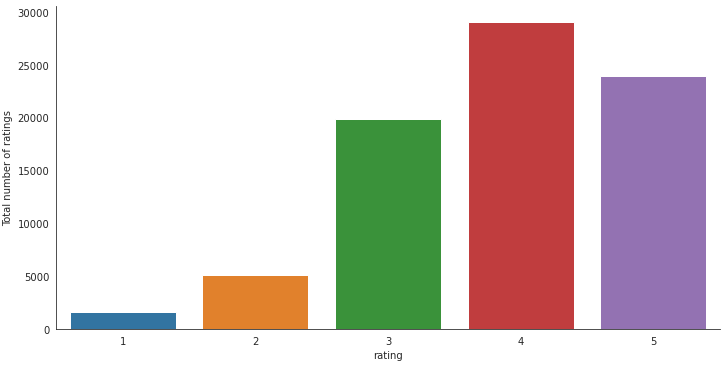

In [8]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=book_ratings, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(book_ratings["rating"])}')

That's enough spelunking through our data, let's go ahead and actually make a recommendation system. 

First up is generating recommendations using Content-based filtering.  

## Content-based Filtering 

### How it works 

<br></br>

<div align="center" style="width: 800px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Content_filtering.jpg"
     alt="Content-based Filtering"
     style="float: center; padding-bottom=0.5em"
     width=800px/>
A depiction of the decision process used to recommend items within content-based filtering algorithms.  
</div> 

In Content-based Filtering, we seek to make recommendations based on **how similar the properties or features of an item are to other items**. 

Let's use the image above to help us see how this works. Mpho is an avid reader who has just finished the novel "The Golden Compass". Besides the written contents inside this book (item), it has certain attributes or properties which further describe it - such as the author ("Philip Pullman"), genre ("fantasy), or target audience ("young adult"). These properties are not unique to this novel, as other books also have authors, genres, target audiences, etc. As such, we can compare the properties of different books with the assumption that books which have properties in common (such as author or genre) are similar to one another. We can further **assume that individuals like similar items**. For our example, this means that Mpho, if using content-based filtering to recommend her next book, would have a book such as "Harry Potter and the Philosopher's Stone" suggested to her over Anne Frank's "The Diary of a Young Girl", as the former novel is far more 'similar' to The Golden Compass.     

So let's see how we would implement a system like this in real life.

### Implementation 

Let's implement a simple content filtering-based recommendation algorithm.

To start off, we need to gather the various properties of our items so that we can convert them into meaningful features. Following along from our example above, we're going to use the `tag_name` field for each book as a representation of properties such as genre, time-period, and target audience. We're also going to consider the `authors` field, as individuals often enjoy reading novels written by the same author. 

We start off by creating a new column in our `books` dataframe called `auth_tags`, which contains the above-motivated contents for each item. We additionally create two pandas series objects to help us translate between book titles and indexes of our dataframe.  

In [10]:
books['auth_tags'] = (pd.Series(books[['authors', 'tag_name']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

# Convienient indexes to between map book titles and indexes of 
# the books dataframe
titles = books['title']
indices = pd.Series(books.index, index=books['title'])

We now need a mechanism to convert these textual features into a format which enables us to compute their relative similarities to one another.

One such approach comes from our NLP toolbox in the form of the TF-IDF vectorisation process, which allows us to translate our string-based collection of tags and authors into numerical vectors (see [here](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for an overview of this process which is very similar to [count-based vectorization](https://youtu.be/W9VtEVBdgnQ)).

In [11]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(books['auth_tags'])

We now can compute the similarity between each vector within our matrix. This is done by making use of the `cosine_similarity` function provided to us by `sklearn`.

In [12]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix, 
                                        tf_authTags_matrix)
print (cosine_sim_authTags.shape)

(10000, 10000)


In [27]:
cosine_sim_authTags[:5]

array([[1.        , 0.21246314, 0.25620534, ..., 0.04730311, 0.07394757,
        0.01578043],
       [0.21246314, 1.        , 0.20308655, ..., 0.04934816, 0.06629237,
        0.02173749],
       [0.25620534, 0.20308655, 1.        , ..., 0.03131751, 0.03967015,
        0.0137797 ],
       [0.11415006, 0.16092333, 0.10326477, ..., 0.06834212, 0.07096014,
        0.04973093],
       [0.11438683, 0.14651929, 0.1160679 , ..., 0.06632025, 0.08923058,
        0.03776143]])

The resulting structure is a $10000 \times 10000$ dense similarity matrix $S^I$, where the value of the entry in the $i^{th}$ row and $j^{th}$ column; $S^I_{i,j}$, corresponds to the similarity of books $i$ and $j$ within our dataset.

Using this notation, if $i$ and $j$ are the same number (i.e. all the diagonal entries in $S^I$), then the similarity value is equal to 1 (an item is completely similar to itself).  

#### Top-N Recommendations

With our content similarity matrix computed, we're now ready to make some recommendations! Let's begin by generating a top-N list of books similar to one which we prompt the system with.    

Following along from our earlier algorithmic explanation, we do this by: 

  1. Select an initial item (book) to generate recommendations from. 
  2. Extract all the similarity values between the initial item and each other item in the similarity matrix.
  3. Sort the resulting values in descending order. 
  4. Select the top N similarity values, and return the corresponding item details to the user. This is now our simple top-N list.  
  
We implement this algorithmic process in the function below:

In [28]:
def content_generate_top_N_recommendations(book_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[book_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    book_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[book_indices]

With our function defined, let's test our simple content-based recommender on some sample book titles: 

In [29]:
content_generate_top_N_recommendations("The Hobbit", N=10)

188     The Lord of the Rings (The Lord of the Rings, ...
154            The Two Towers (The Lord of the Rings, #2)
160     The Return of the King (The Lord of the Rings,...
18      The Fellowship of the Ring (The Lord of the Ri...
610              The Silmarillion (Middle-Earth Universe)
4975        Unfinished Tales of NÃºmenor and Middle-Earth
2308                               The Children of HÃºrin
963     J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...
465                             The Hobbit: Graphic Novel
Name: title, dtype: object

In [30]:
content_generate_top_N_recommendations("Romeo and Juliet", N=10)

352                      Othello
769                Julius Caesar
124                       Hamlet
153                      Macbeth
247    A Midsummer Night's Dream
838       The Merchant of Venice
854                Twelfth Night
529       Much Ado About Nothing
713                    King Lear
Name: title, dtype: object

In [31]:
content_generate_top_N_recommendations("The Diary of a Young Girl", N=10)

86                           Night (The Night Trilogy #1)
178                    Angela's Ashes (Frank McCourt, #1)
799                                  The Story of My Life
1814    Anne Frank Remembered: The Story of the Woman ...
512     The Hiding Place: The Triumphant True Story of...
6546                        I Have Lived a Thousand Years
8027             Anne Frank's Tales from the Secret Annex
89                                          The Outsiders
603                                     Girl, Interrupted
Name: title, dtype: object

Having seen the results of these top-N lists, a couple observations can be made. 

- First, our recommendations seem to be strongly centered around the author of the reference book. For example,  other works by Tolkien and Shakespeare are highly recommended when using reference searches for "The Hobbit" and "Romeo and Juliet" respectively. This could be a natural result of the fact that an author's name is far less common in the dataset than other textual features such as genre. As such, books which share an author will be regarded as being far more similar.  


 - Second, in cases where the reference author has not written multiple book titles, such as Anne Frank (The Diary of a Young Girl), the recommendations produced are more varied and cover multiple titles in the same or similar genres. 

 
Based on these observations, we can ask if in fact the recommendations for "The Hobbit" and "Romeo and Juliet" are actually any good? After all, a reader who knows of Tolkien and Shakespeare will often already know of other books these authors have written as well. This is where some of the subjective metrics introduced earlier (such as diversity), can be used to penalize these recommendations and help discover better ones. 

---
#### Content filtering: Student Exercise

Seeing that we were able to produce more varied recommendations when the author didn't write multiple titles, try to alter the above code cells to calculate similarity only using the `tag_name` field.

How does this alteration affect the recommendations produced?

---

#### Rating Prediction

As motivated previously, in some cases we may wish to directly calculate what rating a user _would_ give a book that they haven't read yet. 

We can modify our content-based filtering algorithm to do this in the following manner: 

   1. Select a reference user from the database and a reference item (book) they have _not_ rated. 
   2. For the user, gather the similarity values between the reference item and each item the user _has_ rated. 
   3. Sort the gathered similarity values in descending order. 
   4. Select the $k$ highest similarity values which are above a given threshold value, creating a collection $K$. 
   5. Compute a weighted average rating from these values, which is the sum of the similarity values of each item multiplied by its assigned user-rating, divided by the sum of the similarity values. This can be expressed in formula as:
   
   $$ \hat{R}_{ju} = \frac{\sum_{i \in K} s_{ij} \times r_{iu}}{\sum_{i \in K} s_{ij}}   $$
   
   Where $\hat{R}_{ju}$ is the weighted average computed for the reference item $j$ and reference user $u$, $K$ is the collection of items, $s_{ij}$ is the similarity computed between items $i$ and $j$, and $r_{iu}$ is the know rating user $u$ has given item $i$.
   6. We return the weighted average $\hat{R}_j$ as the prediction for our reference item.
   
   
We implement this algorithmic process in the function below:

In [32]:
def content_generate_rating_estimate(book_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[book_title]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['user_id']==user].iterrows():
        sim = cosine_sim_authTags[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scoress and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==book_title]['rating'])
    return predictedRating

With our algorithm defined, let's quickly test it out to see some results. 

To help us get a sense of the relevance and accuracy of these ratings, we select a lucky user (number 314) and consider their historical data: 

In [33]:
# Subset of ratings from user 314
book_ratings[book_ratings['user_id'] == 314][3:10]

,user_id,book_id,title,rating
401,314,6,Harry Potter and the Goblet of Fire (Harry Pot...,5
1500,314,29,The Mother Tongue: English and How It Got That...,3
1600,314,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4
1900,314,36,The Lord of the Rings: Weapons and Warfare,4
2300,314,98,What to Expect the First Year (What to Expect),3
2400,314,105,Chapterhouse: Dune (Dune Chronicles #6),3
2501,314,106,Dune Messiah (Dune Chronicles #2),4


We first generate some ratings for books which user 314 has already rated:

In [34]:
title = "The Lord of the Rings: Weapons and Warfare"
actual_rating = book_ratings[(book_ratings['user_id'] == 314) & (book_ratings['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(book_title=title, user=314, rating_data=book_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - The Lord of the Rings: Weapons and Warfare
---
Actual rating: 		 4
Predicted rating: 	 3.82672277262443


In [35]:
title = "Survival in Auschwitz"
actual_rating = book_ratings[(book_ratings['user_id'] == 314) & (book_ratings['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(book_title=title, user=314, rating_data=book_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Survival in Auschwitz
---
Actual rating: 		 2
Predicted rating: 	 2.7984141604453825


We do this again, but now for similar titles which have not been rated:  

In [36]:
title = "The Hobbit"
pred_rating = content_generate_rating_estimate(book_title=title, user=314, rating_data=book_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t ?")
print (f"Predicted rating: \t {pred_rating}")

Title - The Hobbit
---
Actual rating: 		 ?
Predicted rating: 	 3.5748388697863294


In [37]:
title = "Dune (Dune Chronicles #1)"
pred_rating = content_generate_rating_estimate(book_title=title, user=314, rating_data=book_ratings)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t ?")
print (f"Predicted rating: \t {pred_rating}")

Title - Dune (Dune Chronicles #1)
---
Actual rating: 		 ?
Predicted rating: 	 3.7612070634075323


Based on the above results, our content-based ratings seem to be pretty good - being out by than less 1 rating point per know prediction! While we can't make the same judgement for the predicted ratings of the unseen books, they are close to known book ratings which are similar in nature, which is a promising sign.

That's enough of content based filtering. We're now ready to move on to the second type of recommender system methods: collaborative filtering.  

## Collaborative-based Filtering 

### How it works

<br></br>

<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 80px">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Utility_Matrix.jpg"
     alt="Collaborative-based Filtering - Utility Matrix"
     style="float: center; padding-bottom=0.5em"
     width=700px/>
Utility matrix used to assess the similarity between users who have rated items. 
</div>

In content-based filtering, we looked at the similarity between the properties or attributes of items. In Collaborative-based filtering, we **use the similarity measured between users to make recommendations**.

To see how this works, consider several individuals who are currently using our collaborative-based recommender system. Simon, Kwanda, Kieran and Joanne have all rated certain books that they've read, and we've been able to capture these results. Using this information, we can construct what is known as a **Utility Matrix**, which (as shown in the figure above) is a structure simply capturing our rating data in a formal way. In the utility matrix, each user is represented as a row$^*$, and the items (books) in our catalog make up features for each user - whether they have rated a book or not, and what ratings they have given. We note here importantly that this matrix is inherently *sparse*, as there are far more items available in the catalog than a user's supplied ratings.  

Using the structured information in the utility matrix, we can measure how similar users are to one another based on their rating characteristics. Using our example to help make this point, consider how Joanne and Simon could be considered to be similar as both have read the novels "Pride and Prejudice" and "The Diary of a Young Girl", and have given very similar ratings for both. On the other hand, even though Kwanda has also read and similarly rated "The Diary of a Young Girl", he would still be considered less similar to a user like Simon as they have fewer book reviews in common. 

Using this principle of user similarity, when we seek to make a recommendation for a user based on collaborative filtering, we usually seek to determine the *k-neighbors* who are most similar to the user. From these users, we then extract their highly-rated items and use these as a basis for recommendations. 

One powerful argument of why using user similarity is favorable, compared to that of item similarity, lies in recommendation variety. When looking at our content-based recommendations, we observed that the items suggested tended to be homogeneous; they were all by the same author or genre etc. But humans aren't homogeneous all the time - we like different things in different categories and at different times. As collaborative filtering considers similar individuals, it also considers similarities across categories, allowing recommendations to be more varied and natural.

A major downside to this approach, however, is described by what is known as **'Cold-start problem'**. Consider for example user Kieran who has just recently joined our recommender service. He has supplied only one rating; he seems to absolutely love "The Hunger Games". The problem is that no one else in our service has rated that book, and Kieran hasn't rated anything else as well. This predicament means that we cannot get a similarity between Kieran or any other user - making our collaborative approach infeasible! While there are various ways of getting around this problem (we see a simple example in our implementation), the Cold-start problem is an ongoing challenge which continues to haunt recommender system researchers. If you feel passionate about this field, perhaps you need to be the person to go and solve this problem definitively once and for all!

$^*$*Note that this isn't always the case, as its perfectly acceptable for the utility matrix to have rows representing items and columns representing users. The important thing is that we are mapping ratings from users to items in one form or another.*  

### Implementation 

We now implement a simple collaborative filtering-based recommendation algorithm.

In a similar process to content filtering where we first had to gather item features before we could compute their similarity, within collaborative filtering we initially need to gather all user ratings together by forming a utility matrix.

Using `pandas`, we can construct our utility matrix easily by using the `pivot_table` function:

In [38]:
util_matrix = book_ratings.pivot_table(index=['user_id'], 
                                       columns=['title'],
                                       values='rating') 
util_matrix.shape

(28906, 812)

We previously mentioned that the utility matrix is sparse, as it is unlikely that a user has read many of the books within the entire Goodbooks library. To illustrate this point, let's visualise a portion of the utility matrix: 

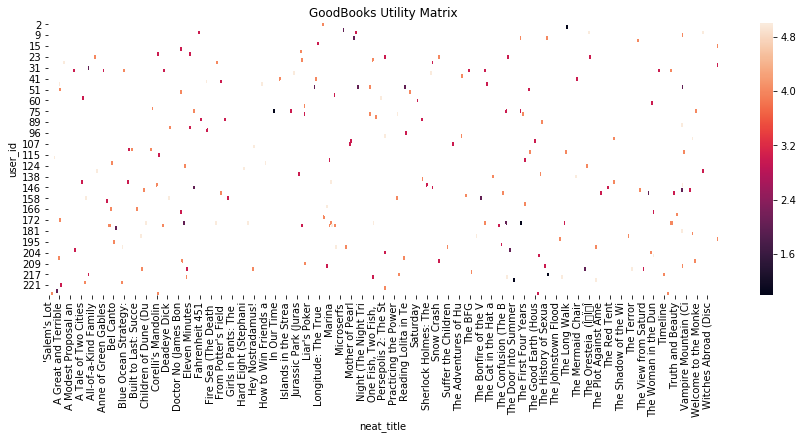

In [39]:
# Create a neat version of the utility matrix to assist with plotting book titles 
book_ratings['neat_title'] = book_ratings['title'].apply(lambda x: x[:20])
util_matrix_neat = book_ratings.pivot_table(index=['user_id'], 
                                            columns=['neat_title'],
                                            values='rating')

fig, ax = plt.subplots(figsize=(15,5))
# We select only the first 100 users for ease of computation and visualisation. 
# You can play around with this value to see more of the utility matrix. 
_ = sns.heatmap(util_matrix_neat[:100], annot=False, ax=ax).set_title('GoodBooks Utility Matrix')

Note that the white regions of the heatmap indicate cells in the utility matrix for which we have no rating data. 

With our utility matrix created, we now preprocess our data in preparation for similarity computation. This is done by normalising each user's set of ratings, filling in Nan values with 0, [transposing](https://www.khanacademy.org/math/linear-algebra/matrix-transformations/matrix-transpose/v/linear-algebra-transpose-of-a-matrix) our matrix for easier indexing, dropping users with no ratings, and storing the matrix in a sparse representation to save memory.    

In [40]:
# Normalize each row (a given user's ratings) of the utility matrix
util_matrix_norm = util_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
# Fill Nan values with 0's, transpose matrix, and drop users with no ratings
util_matrix_norm.fillna(0, inplace=True)
util_matrix_norm = util_matrix_norm.T
util_matrix_norm = util_matrix_norm.loc[:, (util_matrix_norm != 0).any(axis=0)]
# Save the utility matrix in scipy's sparse matrix format
util_matrix_sparse = sp.sparse.csr_matrix(util_matrix_norm.values)

We can now compute the similarity between users based on the ratings they have given various books

In [41]:
# Compute the similarity matrix using the cosine similarity metric
user_similarity = cosine_similarity(util_matrix_sparse.T)
# Save the matrix as a dataframe to allow for easier indexing  
user_sim_df = pd.DataFrame(user_similarity, 
                           index = util_matrix_norm.columns, 
                           columns = util_matrix_norm.columns)

# Review a small portion of the constructed similartiy matrix  
user_sim_df[:5]

user_id,7,10,23,27,35,41,46,47,49,51,...,53364,53366,53372,53373,53378,53381,53393,53403,53406,53420
user_id,,,,,,,,,,,,,,,,,,,,,
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.177657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


With our similarity matrix formed, we are once again in a position to make some recommendations. 

As was the process for content based filtering, we'll first look at generating top-N recommendations and then rating predictions using collaborative filtering

#### Top-N Recommendations

In order to produce a list of top-N recommendations for collaborative filtering, the following simple algorithm can be followed: 

  1. Select an initial reference user to generate recommendations for. 
  2. Extract all the similarity values between the reference user and each other user in the similarity matrix.
  3. Sort the resulting similarity values in descending order, and select the $k$ most similar users based on these values.  
  5. For each selected user, collect their top-rated items. 
  6. Form a tally of which items are most popular across the $k$ similar users. Do this by counting how many times a top-rated item is common amongst the other users. 
  7. Sort the top-rated items according the the popularity tally. Return the top-N values as the result. 
    
  
We implement this algorithmic process in the function below:

In [42]:
def collab_generate_top_N_recommendations(user, N=10, k=20):
    # Cold-start problem - no ratings given by the reference user. 
    # With no further user data, we solve this by simply recommending
    # the top-N most popular books in the item catalog. 
    if user not in user_sim_df.columns:
        return book_ratings.groupby('title').mean().sort_values(by='rating',
                                        ascending=False).index[:N].to_list()
    
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    favorite_user_items = [] # <-- List of highest rated items gathered from the k users  
    most_common_favorites = {} # <-- Dictionary of highest rated items in common for the k users
    
    for i in sim_users:
        # Maximum rating given by the current user to an item 
        max_score = util_matrix_norm.loc[:, i].max()
        # Save the names of items maximally rated by the current user   
        favorite_user_items.append(util_matrix_norm[util_matrix_norm.loc[:, i]==max_score].index.tolist())
        
    # Loop over each user's favorite items and tally which ones are 
    # most popular overall.
    for item_collection in range(len(favorite_user_items)):
        for item in favorite_user_items[item_collection]: 
            if item in most_common_favorites:
                most_common_favorites[item] += 1
            else:
                most_common_favorites[item] = 1
    # Sort the overall most popular items and return the top-N instances
    sorted_list = sorted(most_common_favorites.items(), key=operator.itemgetter(1), reverse=True)[:N]
    top_N = [x[0] for x in sorted_list]
    return top_N  

With our algorithm defined, lets go and look at the recommended books for our friend, user 314:

In [43]:
# Our recommended list for user 314
collab_generate_top_N_recommendations(314)

['Harry Potter and the Goblet of Fire (Harry Potter, #4)',
 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)',
 'The Lord of the Rings: Weapons and Warfare',
 "I'm a Stranger Here Myself: Notes on Returning to America after Twenty Years Away",
 'Treasure Island',
 "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)",
 'Children of Dune (Dune Chronicles #3)',
 'The Broken Wings',
 'Neither Here nor There: Travels in Europe',
 'The Power of One (The Power of One, #1)']

In [44]:
# User 314's historical ratings
book_ratings[book_ratings['user_id'] == 314][:][['title','rating']].sort_values(by='rating', ascending=False)[:10]

,title,rating
0,Harry Potter and the Half-Blood Prince (Harry ...,5
401,Harry Potter and the Goblet of Fire (Harry Pot...,5
4000,The Door Into Summer,4
300,Harry Potter and the Prisoner of Azkaban (Harr...,4
1600,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4
1900,The Lord of the Rings: Weapons and Warfare,4
7501,Memories of My Melancholy Whores,4
2501,Dune Messiah (Dune Chronicles #2),4
16301,"The Long Goodbye (Philip Marlowe, #6)",3
9501,Deception Point,3


In considering our recommended list and comparing it to that of user 314's actual favorite reads, several things stand out: 

 - First, the list we have generated is far more diverse than those we produced via content-based filtering. Here we recommend books which feel more similar in genre than say, the author alone. 
 
 
 - Second, there is an overlap in titles that user 314 has already read and those produced by our list. This is actually understandable, as users who have rated the same content highly will be more similar to the reference user. 
 
 
 - Third, our list's recommendations align well with user 314's preferences. Here highly rated books by the user appear in our recommended list. Just as mentioned for content-based filtering, the use of a metric such as the hit-rate could help quantify this good fit. 

#### Rating Prediction

Just as we did in the content-based approach, we can generate user-item ratings for collaborative filtering. We do this by using the following algorithmic steps: 

   1. Select a reference user from the database and a reference item (book) they have _not_ rated. 
   2. For the reference user, gather the similarity values between them and each other user. 
   3. Sort the gathered similarity values in descending order. 
   4. Select the $k$ highest similarity values which are above a given threshold value, creating a collection $K$ similar users. 
   5. For each user in collection $K$, get their rating of the reference item if it exists (other users may not have rated this item as well)
   6. Compute a weighted average rating from both the gathered rating values and user similarity values. This is expressed in formula as: 
   
   $$ \hat{R}_{ju} = \frac{\sum_{n \in K} s_{nu} \times r_{nj}}{\sum_{u \in K} s_{nu}}   $$
   
   Where $\hat{R}_{ju}$ is the weighted average computed for the reference item $j$ and reference user $u$, $K$ is the collection of similar users, $s_{nu}$ is the similarity computed between users $n$ and $u$, and $r_{nj}$ is the know rating user $n$ has given item $j$.
   6. We return the weighted average $\hat{R}_{ju}$ as the prediction for our reference item.
   
   
We implement this algorithmic process in the function below:

In [45]:
def collab_generate_rating_estimate(book_title, user, k=20, threshold=0.0):
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    # Store the corresponding user's similarity values 
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:k+1]
    rating_list = [] # <-- List of k user's ratings for the reference item
    weight_list = [] # <-- List of k user's similarities to the reference user
    
    # Create a weighted sum for each of the k users who have rated the 
    # reference item (book).
    for sim_idx, user_id in enumerate(sim_users):
        # User's rating of the item
        rating = util_matrix.loc[user_id, book_title]
        # User's similarity to the reference user 
        similarity = user_values[sim_idx]
        # Skip the user if they have not rated the item, or are too dissimilar to 
        # the reference user
        if (np.isnan(rating)) or (similarity < threshold):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    try:
        # Return the weighted sum as the predicted rating for the reference item
        predicted_rating = sum(rating_list)/sum(weight_list) 
    except ZeroDivisionError:
        # If no ratings for the reference item can be collected, return the average 
        # rating given by all users for the item.  
        predicted_rating = np.mean(util_matrix[book_title])
    return predicted_rating

Once again we can use our newly formed function to generate rating predictions for user 314.

We start with some known ratings:

In [46]:
title = "The Lord of the Rings: Weapons and Warfare"
actual_rating = book_ratings[(book_ratings['user_id'] == 314) & (book_ratings['title'] == title)]['rating'].values[0]
pred_rating = collab_generate_rating_estimate(book_title = title, user = 314)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - The Lord of the Rings: Weapons and Warfare
---
Actual rating: 		 4
Predicted rating: 	 4.432698712267665


In [47]:
title = "Harry Potter and the Goblet of Fire (Harry Potter, #4)"
actual_rating = book_ratings[(book_ratings['user_id'] == 314) & (book_ratings['title'] == title)]['rating'].values[0]
pred_rating = collab_generate_rating_estimate(book_title = title, user = 314)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - Harry Potter and the Goblet of Fire (Harry Potter, #4)
---
Actual rating: 		 5
Predicted rating: 	 4.913809586979022


And also two unknown ratings:

In [48]:
title = "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)"
pred_rating = collab_generate_rating_estimate(book_title = title, user = 314)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t ?")
print (f"Predicted rating: \t {pred_rating}")

Title - The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy, #1)
---
Actual rating: 		 ?
Predicted rating: 	 4.02995810161615


In [49]:
title = "Treasure Island"
pred_rating = collab_generate_rating_estimate(book_title = title, user = 314)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t ?")
print (f"Predicted rating: \t {pred_rating}")

Title - Treasure Island
---
Actual rating: 		 ?
Predicted rating: 	 4.571645507538802


Once again, we seem to have derived some very strong results, with our predictions being very close to that of user 314's historical ratings. While again we cannot make any pronouncements on the unseen rating predictions, these values seem to make sense and align with ratings the user has given similar books. 

That's it for collaborative filtering!

## Comparing Collaborative and Content-based Filtering 


Having now considered both content and collaborative-based filtering, we can spend a little time comparing the operation and results of these two methods for recommendation. 

---

#### Metric Comparison: Student Exercise 

Within the above sections we implemented functions for predicting item (book) ratings using both collaborative and content filtering. Using an appropriate performance metric such as RMSE or MAE, determine which of these two methods is more appropriate for the GoodBooks dataset. You could do this by:

   1. Divide the `book_ratings` dataframe into a train and test subset using random sampling. Ensure that the train set is 90 - 95% of the total data.  
   2. Computing similarity matrices using the data available in the train set (this will mainly affect collaborative filtering)
   3. For each user-item rating in the test set, generate a rating prediction. 
   4. Use the historical rating data in the test set to quantify the performance of each technique. 

Once you've computed these results, consider how you could improve either method to be more competitive. How feasible are these changes? 

---

### Other Considerations 

A couple more things to take into account when implementing these methods:

 - **Diversity of Suggestions**: As has already been observed within this train, the diversity of recommendations offered by a recommender algorithm are important. In this sense, collaborative filtering is often considered to produce superior results over content-based filtering.  
 
 
 - **Computational requirements**: While we've used simple examples to illustrate the implementation of collaborative and content-based filtering, you should not overlook considerations for the type of computational resources these methods rely upon. In this sense, both methods require the computation of similarity structures when making recommendations. For content-based filtering, this similarity structure tends to be smaller compared to its collaborative counter-part, as large recommendation services tend to have far more users than items in their databases. The storage of these similarity matrices can take up considerable space. Furthermore, the properties of items remain quite static; meaning that once the item similarity matrix is computed it can be reused indefinitely (until more properties are used for similarity computation). On the other hand, as user ratings are added to at a constant rate, the utility matrix and subsequently user similarity matrix need to be updated regularly to ensure appropriate recommendations are produced.         
  
  
 - **Sparsity Issues**: We've briefly mentioned the Cold-start problem before within this train. To reiterate the point, due to the sparse nature of the utility matrix, it can often become very difficult to make recommendations for users who have few or no ratings captured. However as time increases, systems which make use of collaborative filtering techniques get progressively better as they passively acquire richer rating data.    
 
 
 - **Hybrid Approaches**: In light of the points raised above, one may wonder if there is a 'best of both worlds' approach for recommendation systems which overcomes the limitations of each method. The short is that there is, and this consists of hybrid content-collaborative filtering systems. These are a hot research topic at the moment, with all major tech companies such as Google, Netflix, Facebook, and Amazon refining such hybrid approaches.  

## Conclusion

Phew! We've covered a lot of ground in just one train. Hopefully at this point the ideas behind recommender systems and why they are so economically and socially important are a bit less mystical to us. 

In this train we looked at the building blocks of recommender systems; items (things) and users (people). We've learnt how recommender algorithms fundamentally use similarity as a mechanism to compare these items and users, with item-item similarity being represented by content-based filtering methods, and user-user similarity being an integral part of collaborative filtering methods. We've reviewed each these methods both theoretically and practically through code implementation. Lastly, we've used the results obtained in our implementation step to discuss some trade-offs offered between content and collaborative filtering. 

And that's a wrap, till next time! 

## Additional Links
- [Intro to Recommender Systems](https://www.youtube.com/watch?v=Eeg1DEeWUjA&feature=youtu.be)
- [Advanced Recommender System Metrics](https://wiki.epfl.ch/edicpublic/documents/Candidacy%20exam/Evaluation.pdf)